In [ ]:
# hide
from integrators import *

# pyintegrators

> Integrators connect the information in your Pod. They <b>import your data from external services</b> using <i>Importers</i> (Gmail, WhatsApp, etc.), <b>connect new data to the existing data</b> using <i>indexers</i> (face recognition, spam detection, object detection), and <b>execute actions</b> (sending messages, uploading files).

[![Gitlab pipeline status (self-hosted)](https://img.shields.io/gitlab/pipeline/memri/pyintegrators/dev?gitlab_url=https%3A%2F%2Fgitlab.memri.io&label=CI&logo=gitlab&style=plastic)](https://gitlab.memri.io/memri/pyintegrators/-/pipelines/latest)
[![GitHub last commit](https://img.shields.io/github/last-commit/memri/pyintegrators?logo=gitlab&label=Last%20commit)](https://gitlab.memri.io/memri/pyintegrators/-/commits/dev)
[![Discourse status](https://img.shields.io/discourse/status?color=00A850&label=Discourse&logo=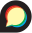&server=https%3A%2F%2Fdiscourse.memri.io)](https://discourse.memri.io) 
[![Twitter URL](https://img.shields.io/twitter/url?label=%40YourMemri&logo=twitter&style=plastic&url=https%3A%2F%2Ftwitter.com%2FYourMemri)](https://twitter.com/YourMemri)

Integrators for Memri have a single repository per language, this is the repository for Python integrators. Memri also has [Node.js integrators](https://gitlab.memri.io/memri/nodeintegrators). This repository is built with [nbdev](https://github.com/fastai/nbdev), which means that the repo structure has a few differences compared to a standard python repo. The documentation for this repo is hosted on [https://pyintegrators.memri.io/integrators/](https://pyintegrators.memri.io/integrators/).

# Installing
Pyintegrators can be installed for two purposes: 1) For local development we recommend to install using pip 2) For deployment we recommend to install using docker. **Currently, the only way to call integrators from the [memri](https://gitlab.memri.io/memri/browser-application) [clients](https://gitlab.memri.io/memri/ios-application)  is using docker, this will change soon.**

## Install with pip
To install the Python package, and correctly setup nbdev for development run:
```bash
pip install -e . && nbdev_install_git_hooks
```
The last command configures git to automatically clean metadata from your notebooks before a commit.

## Install with Docker 
The normal flow to run an integrator is from the client, by calling the [pods](https://gitlab.memri.io/memri/pod) `run_integrator` api. Subsequently, the Integrator is invoked by the Pod by launching a Docker container. To build the image for this container, run:
```bash
docker build -t memri-pyintegrators .
```

## Overview
Pyintegrators currently provides the following integrators. Make sure to check out the documentation for tutorials and usage instructions.

In [ ]:
# hide
from IPython.display import Markdown as md
import integrators.integrator_registry
from integrators.data.basic import *
from integrators.imports import *
from nbdev.test import _test_one

def get_notebook_from_cls(cls):
    path = inspect.getfile(cls)
    f_content = read_file(path)
    file = re.search("(?<=File to edit: )[^\s]*", f_content).group()
    return file[4:] # remove 'nbs/'

txt_passing = '![Build passing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-passing.svg "Build passing")'
txt_failing = '![Build failing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-failing.svg "Build failing")'

table = f"""
| Integrator | Description | Tests passing |
|------------|-------------|---------------|
"""

for m in dir(integrators.integrator_registry):
    if "__" not in m:
        cls = getattr(integrators.integrator_registry, m)
        nb = get_notebook_from_cls(cls)
        test_succeeded = _test_one(nb, verbose=False)[0]
        build_txt = txt_passing if test_succeeded else txt_failing
        
        table += f"|`{cls.__name__}`|{cls.__doc__ if cls.__doc__ is not None else ''}| {build_txt}|\n"

testing importers.EmailImporter.ipynb
testing indexers.FaceClusteringIndexer.indexer.ipynb
testing indexers.GeoIndexer.ipynb
testing indexers.NoteListIndexer.ipynb


In [ ]:
# hide_input
md(table)


| Integrator | Description | Tests passing |
|------------|-------------|---------------|
|`EmailImporter`|Imports emails over imap.| ![Build passing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-passing.svg "Build passing")|
|`FaceClusteringIndexer`|Clusters faces on photos.| ![Build passing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-passing.svg "Build passing")|
|`GeoIndexer`|Adds Countries and Cities to items with a location.| ![Build passing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-passing.svg "Build passing")|
|`NotesListIndexer`|Extracts lists from notes and categorizes them.| ![Build passing](https://gitlab.memri.io/memri/pyintegrators/-/raw/prod/assets/build-passing.svg "Build passing")|


## Nbdev & Jupyter Notebooks
The Python integrators are written in [nbdev](https://nbdev.fast.ai/) ([video](https://www.youtube.com/watch?v=9Q6sLbz37gk&t=1301s)). With nbdev, it is encouraged to write code in 
[Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/install/notebook-classic.html). Nbdev syncs all the notebooks in `/nbs` with the python code in `/integrators`. Tests are written side by side with the code in the notebooks, and documentation is automatically generated from the code and markdown in the notebooks and exported into the `/docs` folder. Check out the [nbdev quickstart](wiki/nbdev_quickstart.md) for an introduction, **watch the video linked above**, or see the [nbdev documentation](https://nbdev.fast.ai/) for a all functionalities and tutorials.

### Contributing
When you make a merge request, make sure that you used all the nbdev commands specified in the [quickstart](wiki/nbdev_quickstart.md).

## Render documentation locally
New documentation will be deployed automatically when a new version is released to the `prod`  branch. To inspect the documentation beforehand, you can run it local machine by [installing Jekyll](https://jekyllrb.com/docs/installation/).

To build the documentation:
```bash
cd docs
gem update --system 
bundle install
```

To serve the documentation:
```bash
bundle exec jekyll serve
```